In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)

In [6]:
df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [9]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=99)

In [10]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

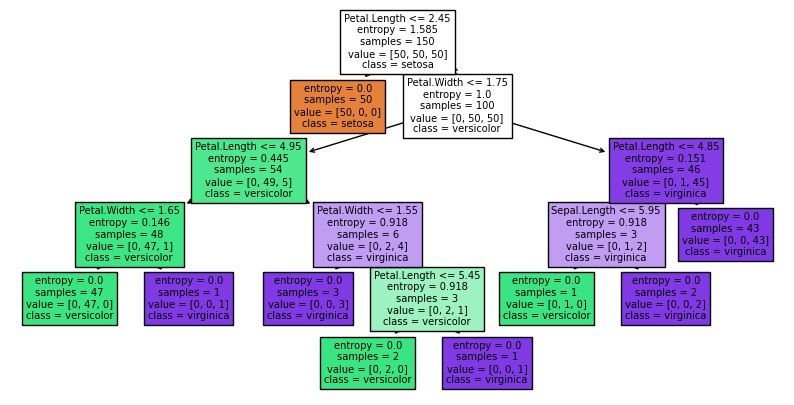

In [11]:
plt.figure(figsize=(10, 5))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=df['Species'].unique())
plt.show()

In [12]:
observado = clf.predict(X)

In [13]:
pd.crosstab(y, observado)

col_0,setosa,versicolor,virginica
Species,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


In [14]:
pd.crosstab(y, observado)

col_0,setosa,versicolor,virginica
Species,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,0,50


# Ejercicio

A partir del dataset original, crear 2 nuevos dataset
- dataset1, con división 70-30 para entrenamiento y prueba
- dataset2, con división 80-20 para entrenamiento y prueba

En ambos dataset, generar el árbol de decisión completo y 
- calcular la matriz de confusión
- estadísticos: accuracy, precision, recall, f1-score

In [23]:
from sklearn import model_selection

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [26]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [27]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=99)

In [28]:
prediction = clf.predict(X_test)

In [29]:
pd.crosstab(Y_test, prediction)

col_0,setosa,versicolor,virginica
Species,,,
setosa,10,0,0
versicolor,0,8,0
virginica,0,1,11


In [36]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [44]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, Y_train)

Y_calculated = clf.predict(X_test)
pd.crosstab(Y_test, Y_calculated)

col_0,setosa,versicolor,virginica
Species,,,
setosa,19,0,0
versicolor,0,13,0
virginica,0,1,12


In [45]:
print(classification_report(Y_test, Y_calculated))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [49]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
cv = KFold(n_splits=10, shuffle=True)

In [55]:
scores = cross_val_score(tree, X, y, scoring='accuracy', cv=cv)
scores

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.86666667,
       0.93333333, 0.93333333, 0.93333333, 0.86666667, 1.        ])

In [59]:
np.mean(scores)

0.9333333333333333

In [58]:
for i, (train_index, test_index) in enumerate(cv.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  11  12  13  14  15  16  18  19
  20  21  22  24  25  26  27  28  29  30  31  32  33  34  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  52  53  55  56  57  58  59  60
  62  63  64  65  66  67  68  69  70  71  73  74  75  76  77  79  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 112 113 114 115 116 117 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 142 144 145 146 147 148 149]
  Test:  index=[ 10  17  23  35  36  51  54  61  72  78  80 111 118 141 143]
Fold 1:
  Train: index=[  0   1   2   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38
  39  40  41  42  43  44  45  46  48  49  50  51  52  54  55  56  57  58
  61  63  64  65  66  67  68  70  71  72  73  74  76  77  78  79  80  81
  82  83  84  85  86  88  89  90  91